In [115]:
import ast
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import pairwise_distances_argmin

In [5]:
CLEAN_DATA_PATH = '/media/luisa/Volume/AML/train_image_level_clean_paths.csv'

In [11]:
clean_data = pd.read_csv(CLEAN_DATA_PATH )
clean_data = clean_data.drop(columns= ['Unnamed: 0'])

In [12]:
clean_data.head()

,id,boxes,label,StudyInstanceUID,study_label,path,image,image_size
0,000a312787f2_image,"[{'x': 789.28836, 'y': 582.43035, 'width': 102...",opacity 1 789.28836 582.43035 1815.94498 2499....,5776db0cec75,Typical Appearance,/media/luisa/Volume/AML/siim-covid19-detection...,000a312787f2.dcm,"(3488, 4256)"
1,000c3a3f293f_image,NaN,none 1 0 0 1 1,ff0879eb20ed,Negative for Pneumonia,/media/luisa/Volume/AML/siim-covid19-detection...,000c3a3f293f.dcm,"(2320, 2832)"
2,0012ff7358bc_image,"[{'x': 677.42216, 'y': 197.97662, 'width': 867...",opacity 1 677.42216 197.97662 1545.21983 1197....,9d514ce429a7,Typical Appearance,/media/luisa/Volume/AML/siim-covid19-detection...,0012ff7358bc.dcm,"(2544, 3056)"
3,001398f4ff4f_image,"[{'x': 2729, 'y': 2181.33331, 'width': 948.000...",opacity 1 2729 2181.33331 3677.00012 2785.33331,28dddc8559b2,Atypical Appearance,/media/luisa/Volume/AML/siim-covid19-detection...,001398f4ff4f.dcm,"(3520, 4280)"
4,001bd15d1891_image,"[{'x': 623.23328, 'y': 1050, 'width': 714, 'he...",opacity 1 623.23328 1050 1337.23328 2156 opaci...,dfd9fdd85a3e,Typical Appearance,/media/luisa/Volume/AML/siim-covid19-detection...,001bd15d1891.dcm,"(2800, 3408)"


In [29]:
# add column with boxes as array

boxes_arr = []
for i in clean_data['boxes']:
    if i is np.NaN:
        b = []
    else:
        b = []
        a = ast.literal_eval(i)
        for j in a:
            x_min = j['x']
            y_min = j['y']
            x_max = j['x'] + j['width']
            y_max = j['y'] + j['height']
            b.append([x_min, y_min, x_max, y_max])
            
        
    boxes_arr.append(b)
        
clean_data['boxes_arr'] = boxes_arr

In [76]:
clean_data['boxes_per_img'] = [len(i) for i in clean_data['boxes_arr']]

In [77]:
clean_data.head()


,id,boxes,label,StudyInstanceUID,study_label,path,image,image_size,boxes_arr,boxes_per_img
0,000a312787f2_image,"[{'x': 789.28836, 'y': 582.43035, 'width': 102...",opacity 1 789.28836 582.43035 1815.94498 2499....,5776db0cec75,Typical Appearance,/media/luisa/Volume/AML/siim-covid19-detection...,000a312787f2.dcm,"(3488, 4256)","[[789.28836, 582.43035, 1815.94498, 2499.73327...",2
1,000c3a3f293f_image,NaN,none 1 0 0 1 1,ff0879eb20ed,Negative for Pneumonia,/media/luisa/Volume/AML/siim-covid19-detection...,000c3a3f293f.dcm,"(2320, 2832)",[],0
2,0012ff7358bc_image,"[{'x': 677.42216, 'y': 197.97662, 'width': 867...",opacity 1 677.42216 197.97662 1545.21983 1197....,9d514ce429a7,Typical Appearance,/media/luisa/Volume/AML/siim-covid19-detection...,0012ff7358bc.dcm,"(2544, 3056)","[[677.42216, 197.97662, 1545.21983, 1197.75876...",2
3,001398f4ff4f_image,"[{'x': 2729, 'y': 2181.33331, 'width': 948.000...",opacity 1 2729 2181.33331 3677.00012 2785.33331,28dddc8559b2,Atypical Appearance,/media/luisa/Volume/AML/siim-covid19-detection...,001398f4ff4f.dcm,"(3520, 4280)","[[2729, 2181.33331, 3677.00012, 2785.33331]]",1
4,001bd15d1891_image,"[{'x': 623.23328, 'y': 1050, 'width': 714, 'he...",opacity 1 623.23328 1050 1337.23328 2156 opaci...,dfd9fdd85a3e,Typical Appearance,/media/luisa/Volume/AML/siim-covid19-detection...,001bd15d1891.dcm,"(2800, 3408)","[[623.23328, 1050, 1337.23328, 2156], [2578.56...",2


total number of images: 6086
maximum num boxes per image: 8
number of images with more than 3 boxes: 25
number of images with more than 2 boxes: 208


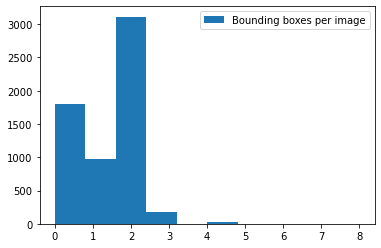

In [106]:
#hist = clean_data['boxes_per_img'].hist(bins = 10)
print('total number of images: ' + str(len(clean_data)))
print('maximum num boxes per image: ' + str(max(clean_data['boxes_per_img'])))
print('number of images with more than 3 boxes: ' + str(len(clean_data[clean_data['boxes_per_img'] >3])))
print('number of images with more than 2 boxes: ' + str(len(clean_data[clean_data['boxes_per_img'] >2])))

counts, bins = np.histogram(clean_data['boxes_per_img'])
plt.hist(bins[:-1], bins, weights=counts, label = 'Bounding boxes per image')
plt.legend()
plt.savefig('/media/luisa/Volume/AML/report_imgs/boxes_per_img.png')
plt.show()


In [160]:
# array with aspect ratios of all bounding boxes
aspect_ratios = []
# arrays with width and height of all bounding boxes
boxes_w_h = []

for i in clean_data['boxes_arr']:

    for j in i:
        w = j[2]- j[0]
        h = j[3]- j[1]
        ratio = w/h
        
        aspect_ratios.append(ratio)
        boxes_w_h.append([w, h])
        
aspect_ratios = np.array(aspect_ratios)    
boxes_w_h = np.array(boxes_w_h)





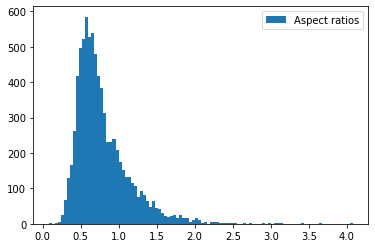

In [168]:
plt.hist(aspect_ratios, bins = 100, label = 'Aspect ratios')
plt.legend()
plt.savefig('/media/luisa/Volume/AML/report_imgs/aspect_ratios_all.png')
plt.show()

#

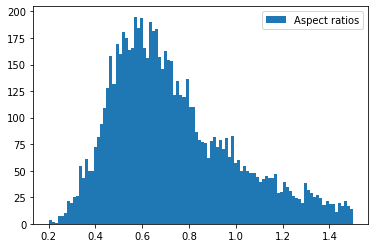

In [169]:
plt.hist(aspect_ratios, bins = 100, range = (0.2, 1.5), label = 'Aspect ratios')
plt.legend()
plt.savefig('/media/luisa/Volume/AML/report_imgs/aspect_ratios_range.png')
plt.show()



[1 1 5 ... 6 0 0]


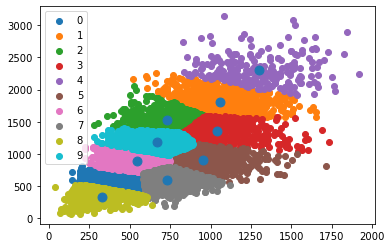

centroid: [438.31361929 578.94679298]
ratio: 0.7570879131013657

centroid: [1060.22815026 1814.6414895 ]
ratio: 0.5842631486152147

centroid: [ 732.55458658 1533.72639573]
ratio: 0.4776305530212281

centroid: [1037.68739171 1364.07614424]
ratio: 0.7607254155797979

centroid: [1296.69396799 2309.12859494]
ratio: 0.5615512149624893

centroid: [951.87845664 913.63210365]
ratio: 1.0418618750755897

centroid: [542.99805694 897.89734594]
ratio: 0.6047440271365904

centroid: [730.07935054 589.29442261]
ratio: 1.2389042260116867

centroid: [326.26805582 329.52262204]
ratio: 0.9901233906275981

centroid: [ 666.88104667 1182.20058336]
ratio: 0.5641014359596646



In [163]:
# k means

kmeans = KMeans(n_clusters= 10)
 
#predict the labels of clusters.
label = kmeans.fit_predict(boxes_w_h)
print(label)

unique_labels = np.unique(label)
centroids = kmeans.cluster_centers_
for i in unique_labels:
    plt.scatter(boxes_w_h[label == i , 0] , boxes_w_h[label == i , 1] , label = i)
plt.scatter(centroids[:,0] , centroids[:,1] , s = 80)
    
plt.legend()
plt.savefig('/media/luisa/Volume/AML/report_imgs/kmeans.png')
plt.show()

for i in centroids:
    print('centroid: '+ str(i))
    print('ratio: ' + str(i[0]/i[1]))
    print()
#print(centroids)

In [56]:
print('max aspect ratio ' + str(max(aspect_ratios)))
print('min aspect ratio '+ str(min(aspect_ratios)))

max aspect ratio 4.078948092609048
min aspect ratio 0.07831357919504249


In [170]:
print('aspect ratios chosen for Faster R-CNN: 1,  0.8, 0.6')

aspect ratios chosen for Faster R-CNN: 1,  0.8, 0.6


In [ ]:
# sizes after resizing:
for i in centroids:
    